<a href="https://colab.research.google.com/github/PrajwalRaj21/Machine-Learning-With-Python/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**



*   Supervised learning technique
*   used to predict the correct label for new data
*   Example: Predicting if an email is spam or not






In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


# **Dataset**

This specific dataset seperates flowers into 3 different classes of species.


*   Setosa
*   Versicolor
*   Virginica

The information about each flower is the following:


*   Sepal Lenght
*   sepal widht
*   petal lenght
*   petal width








In [3]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [6]:

train_path = tf.keras.utils.get_file(
    'iris_training.csv', "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    'iris_test.csv', "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)


2194/2194 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
573/573 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step


In [7]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [9]:
train.shape

(120, 5)

In [10]:
train.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='Species'>

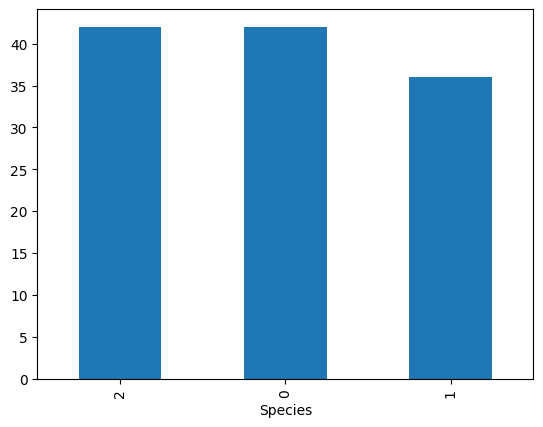

In [11]:
train['Species'].value_counts().plot(kind='bar')

<Axes: >

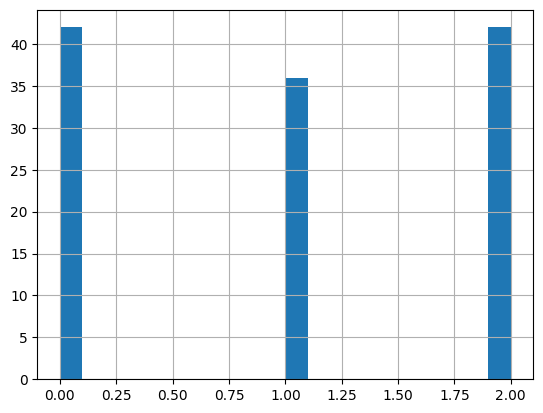

In [14]:
train['Species'].hist(bins=20)

In [15]:
train_y = train.pop('Species')
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [16]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [17]:
train.shape

(120, 4)

Input Function

In [18]:
def input_fn(features, labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

  if training:
    dataset = dataset.shuffle(1000).repeat()

  return dataset.batch(batch_size)

In [19]:
feature_columns = []
for key in train.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=key))
print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
